<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Ensemble methods
© ExploreAI Academy

In this train, we'll implement various ensemble methods using the Python scikit-learn library to enhance prediction models.

## Learning objectives

By the end of this train, you should be able to:
- Identify and apply different ensemble techniques within the scikit-learn framework.
- Execute an ensemble method to improve the performance of a predictive model on a given dataset.
- Evaluate and compare the effectiveness of ensemble methods versus single-model approaches.

## Exercise

### Exercise 1: Exploratory data analysis (EDA)

Before we dive into ensemble methods, it's crucial to start with a robust feature selection process. This will help ensure that our models are only trained on variables that have a significant impact on our predictive variable, `BiodiversityHealthIndex`.

Conduct a thorough EDA to understand the relationships between `BiodiversityHealthIndex` and other environmental indicators in the dataset. Look for patterns, anomalies, or any insights that can inform your feature selection process.

Steps:
1. Load and inspect the dataset (URL: `https://raw.githubusercontent.com/Explore-AI/Public-Data/master/SDG_15_Life_on_Land_Dataset.csv`). 
2. Generate summary statistics for numerical features. 
3. Visualise the distribution of the `BiodiversityHealthIndex`.  
4. Use a pairplot to visualise the relationships between variables.

First 5 rows:


,Year,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity,BiodiversityHealthIndex
0,2010,35,7.542535,6.630073,39,46,1.193810,0.032204,70,33,13,22,1.419332,1.671324,9.311312,0.270434,0.194332
1,2010,13,1.617642,6.477132,45,18,8.484718,-4.803485,69,67,57,63,3.048794,5.815305,4.698086,0.729916,0.525779
2,2010,10,0.904817,9.069428,28,59,3.412444,-2.563852,72,85,37,46,7.863218,9.543694,2.080495,0.068508,0.684795
3,2010,36,7.060190,7.061932,37,88,9.718453,3.425382,64,85,96,60,1.065595,4.938359,2.192657,0.145065,0.926146
4,2010,24,8.439246,4.504786,41,88,9.118186,-1.295086,12,0,85,61,9.785784,2.114002,7.405189,0.809798,0.126345



Summary statistics:


,Year,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity,BiodiversityHealthIndex
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2014.84000,49.922000,4.928142,5.113608,25.018000,49.741000,4.940977,-0.019767,50.089000,51.456000,50.913000,49.23000,4.973307,4.933624,5.008834,0.502102,0.496296
std,3.15854,29.283604,2.855896,2.847654,14.461979,28.918129,2.890359,2.901123,28.878834,28.799852,29.382082,29.26793,2.873200,2.884834,2.880006,0.285773,0.287264
min,2010.00000,0.000000,0.001884,0.004428,0.000000,0.000000,0.002270,-4.960816,0.000000,0.000000,0.000000,0.00000,0.001852,0.010223,0.010870,0.000119,0.000241
25%,2012.00000,25.000000,2.383995,2.708338,13.000000,24.000000,2.487451,-2.566369,24.000000,28.000000,25.000000,23.00000,2.566990,2.527470,2.566212,0.259501,0.249755
50%,2015.00000,49.000000,4.957500,5.224919,24.000000,49.000000,4.762296,0.012879,51.000000,53.000000,52.000000,49.00000,4.954507,4.835744,5.037683,0.510614,0.495439
75%,2018.00000,75.000000,7.397943,7.586436,38.000000,76.000000,7.423117,2.538136,75.000000,76.000000,77.250000,75.00000,7.363273,7.395399,7.516393,0.748538,0.737069
max,2020.00000,100.000000,9.970782,9.997138,50.000000,100.000000,9.987929,4.994607,100.000000,100.000000,100.000000,100.00000,9.994964,9.996356,9.990908,0.999009,0.999817


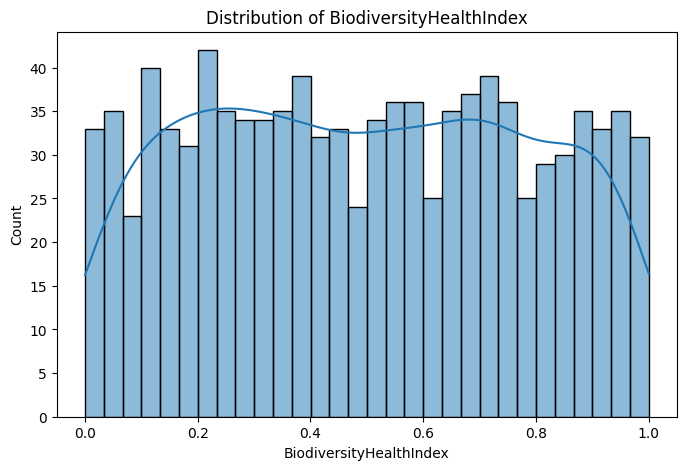

In [ ]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/SDG_15_Life_on_Land_Dataset.csv')

# 1) Inspect: head and summary statistics
print("First 5 rows:")
display(data.head())
print("\nSummary statistics:")
display(data.describe())

# 2) Distribution of BiodiversityHealthIndex
plt.figure(figsize=(8,5))
sns.histplot(data['BiodiversityHealthIndex'].dropna(), bins=30, kde=True)
plt.title('Distribution of BiodiversityHealthIndex')
plt.xlabel('BiodiversityHealthIndex')
plt.ylabel('Count')
plt.show()

# 3) Pairplot (use a sample for speed)
numeric = data.select_dtypes(include='number')
sample_size = min(200, len(numeric))
sns.pairplot(numeric.sample(sample_size, random_state=42))
plt.show()

### Exercise 2: Correlation analysis
Calculate the correlation coefficients between `BiodiversityHealthIndex` and each of the other environmental indicators. This will help us identify the variables most closely related to our target variable.

In [ ]:
# your code here


### Exercise 3: Selecting top variables and adjusting the dataset
Based on the correlation analysis, select the top six variables (`top_variables`) that show the highest correlation with `BiodiversityHealthIndex`. Adjust our dataset to include only the selected six variables and `BiodiversityHealthIndex`. This refined dataset will be used for training and testing our ensemble models.

In [ ]:
# your code here

### Exercise 4: `RandomForestRegressor`

Implement a `RandomForestRegressor` from `sklearn.ensemble` to predict `BiodiversityHealthIndex` based on other environmental indicators. Split the data into training and test sets, fit the `RandomForestRegressor` model on the training data, and calculate the R-squared value on the test set.

In [ ]:
# your code here

### Exercise 5: `GradientBoostingRegressor`

Introduce `GradientBoostingRegressor` to predict `BiodiversityHealthIndex` using the same dataset. Train the model on the same training data and evaluate its R-squared value on the test set. Compare its performance with the `RandomForestRegressor`.

In [ ]:
# your code here

## Solution

### Exercise 1: Exploratory data analysis (EDA)

**Explanation**: This exercise introduces data analysis and visualisation techniques using `Pandas`, `Matplotlib`, and `Seaborn` libraries in Python. 

It starts by loading a biodiversity dataset with Pandas, providing a quick look at its structure through the initial rows and summary statistics. This foundation helps identify data characteristics and potential irregularities. 

The script then visualises the distribution of the `BiodiversityHealthIndex` using `Seaborn`, offering insights into its frequency across the dataset. 

Finally, it employs `Seaborn`'s `pairplot` on a dataset sample to explore relationships between variables, which is crucial for identifying correlations and trends that could inform further analysis. 

This approach outlines the importance of preliminary data exploration and visualisation in uncovering underlying patterns and guiding subsequent analytical steps.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/SDG_15_Life_on_Land_Dataset.csv')

# Display the first few rows of the dataset
print(data.head())

# Summary statistics for numerical features
print(data.describe())

# Visualising the distribution of the BiodiversityHealthIndex
plt.figure(figsize=(8, 6))
sns.displot(data['BiodiversityHealthIndex'])
plt.title('Distribution of BiodiversityHealthIndex')
plt.xlabel('BiodiversityHealthIndex')
plt.ylabel('Frequency')
plt.show()

# Pairplot to visualise the relationships between variables
sns.pairplot(data.sample(100))  # Adjust sample size as necessary
plt.show()

The **summary statistics table** provides us with a general 'feel' of the data. Looking at the values, there is nothing particularly concerning. Something to note is that the year column was picked up as numeric, and we'll most likely drop that going forward. 

**The distribution** of the BiodiversityHealthIndex shows that the values are distributed quite evenly between 0 and  1, with only two small spikes. 

**The pairplot** is where we get most of our information to build our model – but it looks as if might be a tough one, considering that there are no clear patterns or trends visible, not between the BiodiversityHealthIndex and the other variables, or even between any of the other variables. But let's see where it goes. 


### Exercise 2: Correlation analysis

**Explanation**: This exercise calculates and visualises the correlation between all variables in a dataset, emphasising those related to `BiodiversityHealthIndex`. The correlation matrix is visualised using a heatmap, making it easy to identify which variables have the strongest linear relationships with `BiodiversityHealthIndex`. This process aids in feature selection by pinpointing the most influential variables for predictive modelling, thereby streamlining the development of more accurate and efficient models.

In [ ]:
# Correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

# Focus on correlations with BiodiversityHealthIndex
bhi_corr = corr_matrix['BiodiversityHealthIndex'].sort_values(ascending=False)
print(bhi_corr)

The **correlation matrix** confirms what the pairplot suggested – there's very little correlation between the independent variables and the biodiversity index. Considering that strong correlation is at a value of 1, and our variables are much, much smaller at values closer to zero, there might be problems fitting a model. We'll forge ahead for now and see what happens!

### Exercise 3: Selecting top variables and adjusting the dataset

**Explanation**: This exercise narrows down the dataset to the six most impactful variables for predicting `BiodiversityHealthIndex`, based on previous correlation analysis. By focusing on the top six variables, it aims to enhance model accuracy and simplicity. The last command previews the refined dataset, ensuring the adjustments align with our predictive modelling objectives.

In [ ]:
# Variable names from our correlation analysis output above
top_variables = ['SpeciesReintroductionEfforts', 'LandUseChange', 'ForestCoverChange', 'EcoTourismImpact', 'ConservationFunding', 'CarbonEmissionLevels']

# Adjusting the dataset
X = data[top_variables]
y = data['BiodiversityHealthIndex']

# Display the first few rows of the adjusted dataset
print(X.head())

### Exercise 4: `RandomForestRegressor`

**Explanation**: In this exercise, we train a `RandomForestRegressor`, a type of ensemble machine learning model, to predict outcomes based on input variables (`X`). It splits data into training and test sets to ensure model validation on unseen data, trains the model, and then evaluates its accuracy using the R-squared metric, which measures how well the model's predictions match the actual values. The use of `random_state` ensures reproducibility in results.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print(f"R-squared of the RandomForestRegressor: {r_squared}")


Well, this brings us to an uncomfortable reality of building models. We have a negative R-squared value! This is a big red flag and should never be ignored (and the model should never be used as is). This suggests that there are not enough predictive powers in our model to predict with success. Considering that we know there is very little correlation between the input variables and the actual output variable that we could see earlier, this shouldn't come as a surprise. 

The obvious question now: What do we do? In short, some data are just not made for fitting models – we cannot change the fact that we have no predictors, even though we have a fantastic algorithm to use. Normally, we could play around to see what's happening and maybe find some relationships, but given the lack of patterns, linearity in relationships, and general lack of correlation, it's unlikely to be successful.

### Exercise 5: `GradientBoostingRegressor`

**Explanation**: The R-squared value indicates how well the model predictions approximate the real data points. Both RandomForestRegressor and GradientBoostingRegressor are powerful ensemble techniques for regression tasks. Gradient boosting, by sequentially correcting errors of the previous trees, can potentially achieve higher accuracy. The comparison of their R-squared values will show which model is more effective in this context.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialise the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Fit the model
gb_regressor.fit(X_train, y_train)

# Predict on the test set with GradientBoostingRegressor
y_pred_gb = gb_regressor.predict(X_test)

# Calculate R-squared for GradientBoostingRegressor
r_squared_gb = r2_score(y_test, y_pred_gb)
print(f"R-squared of the GradientBoostingRegressor: {r_squared_gb}")

# Compare with RandomForestRegressor R-squared
print(f"R-squared of the RandomForestRegressor: {r_squared}")

When fitting the gradient boosting model, we are again faced with a **negative R-squared** value. This confirms our experience with the tree model – it's unlikely that this data, in its current form and with the current lack of clear relationships, will be able to predict using either of these models. 

A large part of fitting models to data is knowing when the model is acceptable and when it's almost worse than just using a moving average to suggest future paths. Today was unfortunately one of those days where we'll need to find a different solution, as neither of these models are fit for predicting outputs. It's important to be truthful about models fitting poorly and about models not fitting at all (as we had today). Use the metrics produced to guide you, use the assumptions we introduced in earlier lessons to assess whether data might be appropriate for fitting a model, and only then start the process. 

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>